#**Understanding the data:**

When was this data  aquired?
The data was collecetd between June 5, 2014 to June 12,2014. Th range of the datesd within the data ranges from May 1, 2014, to July 9, 2014.

Where was this data aquired form?
The data's georgically is based in the USA and more specifically the cities in  state of washington.

How was this data Aquired?
The method used to quire this data was collection emthdology. This gives us the idea that the author ysed puvlic records such as websites like zillow.com and other safe real estate recrods that are abilable  for the public.
what are the atrributes for this data? Within this data set you sell that theres a mixure of categroical ordinala nd numbeircal values.
This data set has a total of 18 attributes.
1. Date: The date when the property was sold. This feature helps in understanding the temporal trends in property prices.
2. Price:The sale price of the property in USD.
3. Bedrooms:The number of bedrooms in the property. Generally, properties with more bedrooms tend to have higher prices.
4. Bathrooms: The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.
5. Sqft Living: The size of the living area in square feet. Larger living areas are typically associated with higher property values.
6. Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s desirability and value.
7. Floors: The number of floors in the property. Properties with multiple floors may offer more living space and appeal.
8. Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other-wise). Properties with waterfront views are often valued higher.
9. View: An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.
10. Condition: An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.
11. Sqft Above: The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.
12. Sqft Basement: The square footage of the basement. Basements may add value depending on their usability.
13. Yr Built: The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.
14. Yr Renovated: The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.
15. Street: The street address of the property. This feature can be used to analyze location-specific price trends.
16. City: The city where the property is located. Different cities have distinct market dynamics.
17.Statezip: The state and zip code of the property. This feature provides regional
context for the property.
18. Country: The country where the property is located.


In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

import pandas as pd

def read_csv_from_path(file_path):
    try:
        df = pd.read_csv(file_path)

        return df
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

# Example usage
file_path = path+"/USA Housing Dataset.csv"  # Update with your actual file path
print(file_path)
T1 = read_csv_from_path(file_path)

T1.head()

/root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# **Data summary and instiful sights:**

In [22]:


# Calculate summary statistics
summary_stats = T1.describe().T

# range (Max - Min)
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

# mode for each column
mode_values = T1.mode().iloc[0]  # Take the first mode in case there are multiple modes
summary_stats['mode'] = mode_values

#the summary stats
summary_stats = summary_stats[['mean', '50%', 'std', 'range', 'mode']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
print(summary_stats)

# Checking for missing values in the dataset
missing_values = T1.isnull().sum()

#showing the missing values for each column
missing_values
# Check for empty string values in the dataset
empty_values = (T1 == '').sum()

# showing  the number of empty string values for each column
empty_values




                        mean     median            std        range    mode
price          553062.877289  460000.00  583686.452245  26590000.00     0.0
bedrooms            3.400483       3.00       0.903939         8.00     3.0
bathrooms           2.163043       2.25       0.784733         6.75     2.5
sqft_living      2143.638889    1980.00     957.481621      9670.00  1720.0
sqft_lot        14697.638164    7676.00   35876.838123   1073580.00  5000.0
floors              1.514130       1.50       0.534941         2.50     1.0
waterfront          0.007488       0.00       0.086219         1.00     0.0
view                0.246618       0.00       0.790619         4.00     0.0
condition           3.452415       3.00       0.678533         4.00     3.0
sqft_above       1831.351449    1600.00     861.382947      7650.00  1200.0
sqft_basement     312.287440       0.00     464.349222      4820.00     0.0
yr_built         1970.814010    1976.00      29.807941       114.00    2005
yr_renovated

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


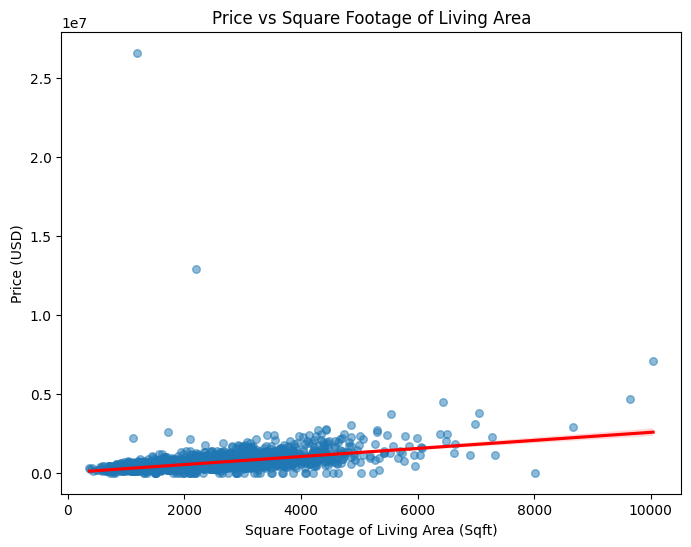

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=T1['sqft_living'], y=T1['price'], scatter_kws={'alpha': 0.5, 's': 30}, line_kws={'color': 'red'})

# Labels and title
plt.title("Price vs Square Footage of Living Area")
plt.xlabel("Square Footage of Living Area (Sqft)")
plt.ylabel("Price (USD)")

# Show plot
plt.show()
